In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [4]:
file = "datasets/diabetes.csv"

In [5]:
df = pd.read_csv(file)

In [6]:
result = df["Outcome"]

In [7]:
data = df.drop( 'Outcome', axis = 1)

In [8]:
data = pd.get_dummies(data)

In [9]:
data = pd.get_dummies(data)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
%matplotlib inline

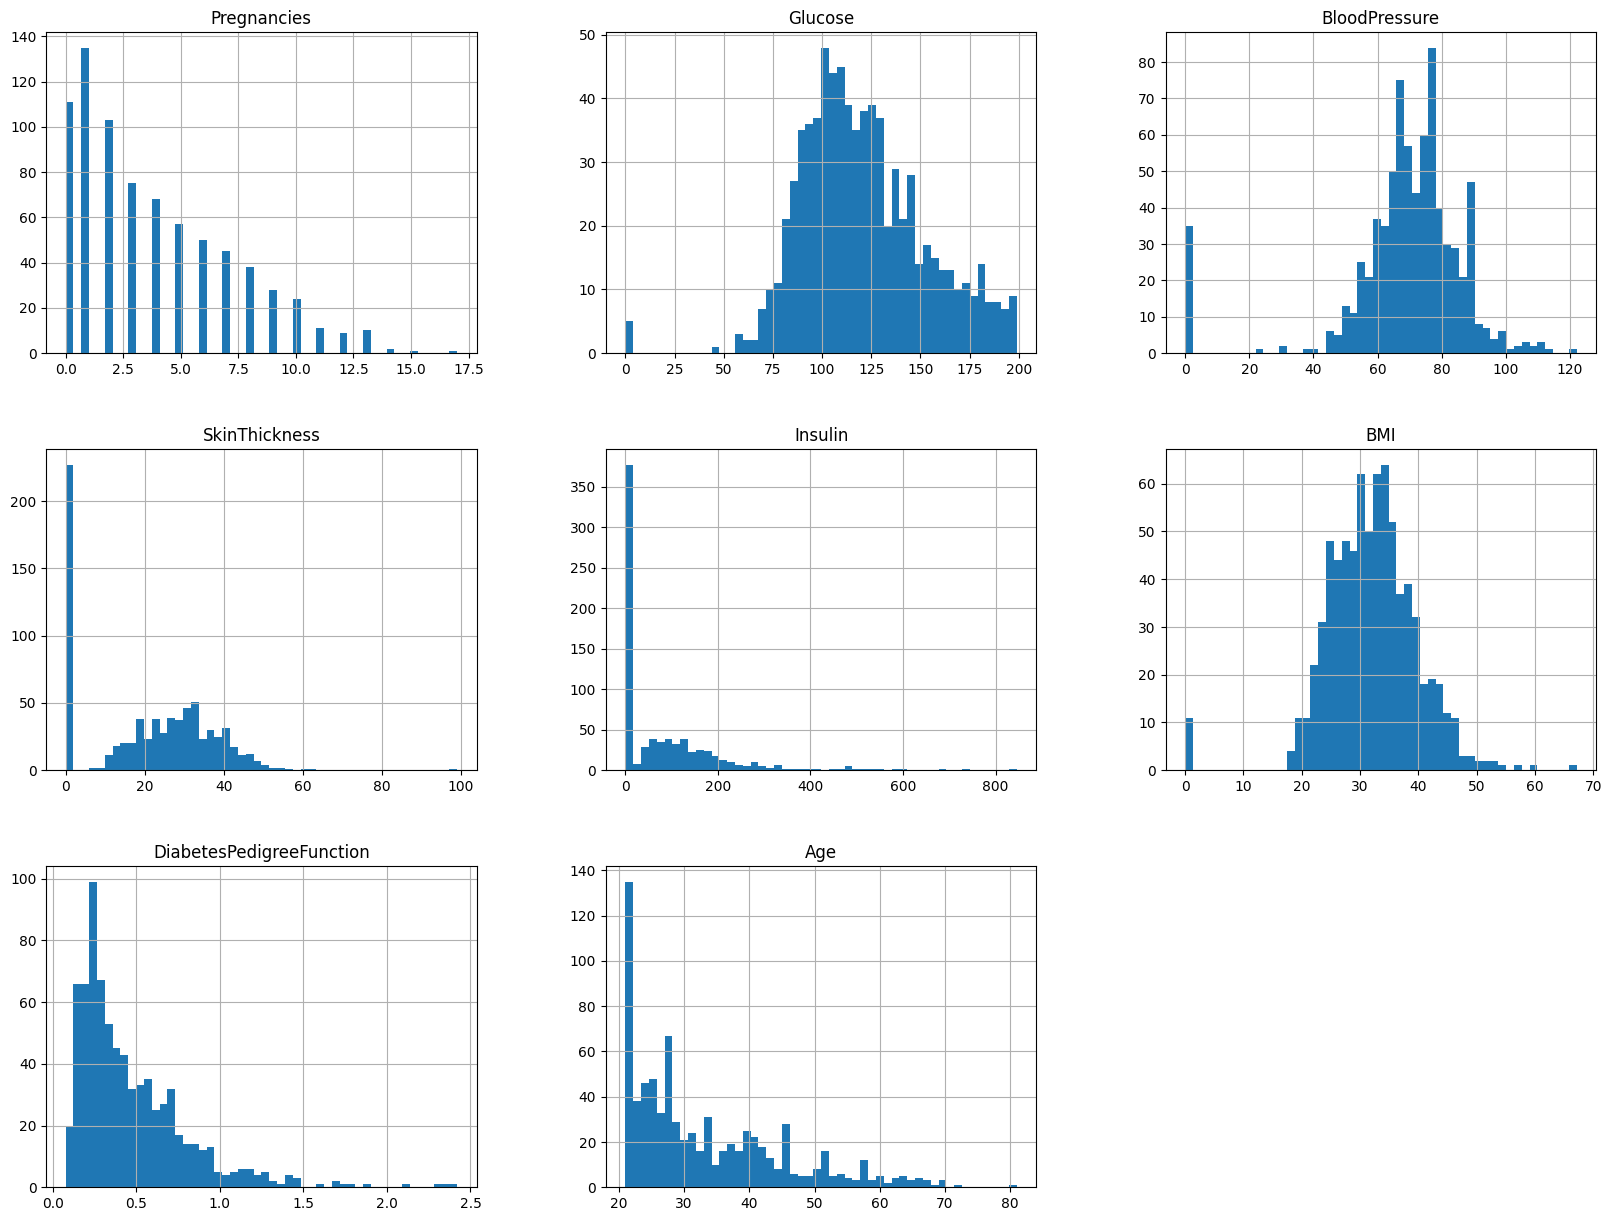

In [12]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [13]:
print("Blood Pressure range:", data.BloodPressure.min(), data.BloodPressure.max())
print("Age range:", data.Age.min(),data.Age.max())
print("Glucose range:", data.Glucose.min(),data.Glucose.max())

Blood Pressure range: 0 122
Age range: 21 81
Glucose range: 0 199


In [14]:
Создание тестового набора данных

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1459656234.py, line 1)

In [15]:
Простой способ разбиения на тренировочный и тестовый наборы
Проблема заключается в том, что каждый раз будет генерироваться новые наборы и 
в таком случае алгоритм увидит все ваши данные Для решения проблем нужно либо 
при первом прогоне сохранить их либо установить seed. Но и это не самый надежный 
способ, так как он перестает работать на обновленном и загруженном датасете

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1353625257.py, line 1)

In [16]:

def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [17]:
Для обеспечения стабтльного разделения наборов используют идентификатор(при условии, если он уникален и неизменяем) 
Например вычислить хэш код экземляра и помещать его в тесторвый набор если значение его хеша меньше или равен 20: 
от максимального хэша

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3113215384.py, line 1)

In [18]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [19]:
Но наш набор не имеет идентификатора, универсальное решение представляет из себя использование индекса строки

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3688895293.py, line 1)

In [20]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [21]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

In [22]:
Случайные выборки хороши, когда объемы выборки велики. 
Но когда это не так велик риск смещения выборки (данная нерепрезентативна в плане распределений). Нужна стратификация

SyntaxError: invalid syntax. Perhaps you forgot a comma? (990169740.py, line 1)

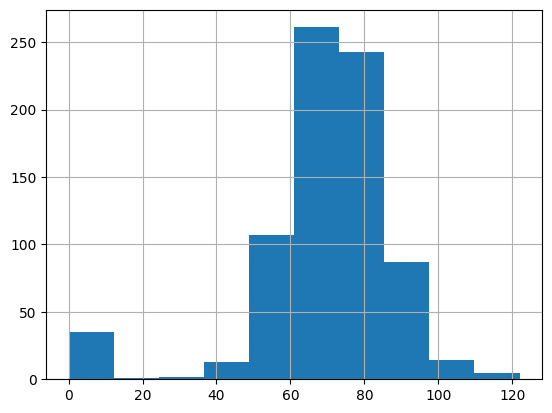

In [23]:
data.BloodPressure.hist();

In [24]:
data['BloodPressure_category'] = pd.cut(data['BloodPressure'],bins=[-1,20,40,60,80, np.inf],labels=[0,20,40,60,80])

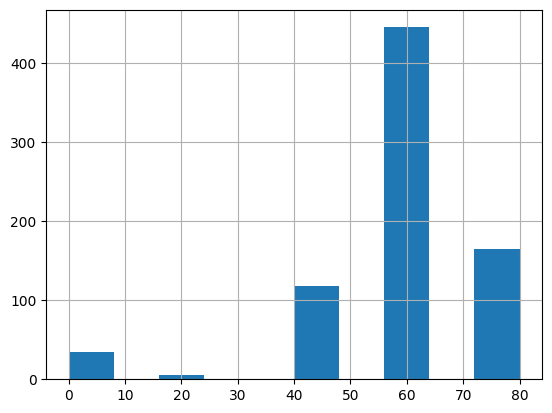

In [25]:
data.BloodPressure_category.hist();

In [26]:
##Стратификационная выборка

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['BloodPressure_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[407 210 197 117 138 561 731 727  46 321 736 419 216 438  71 512 442 668
 457 112 578  65 247 746 467  74 350 418 348 115 686 538 759 665 729 380
 526 120 339 479 387  54   3 286 735 102 760 239 377  39 428 484 697 111
 574 459 351  79 104 737 758 258  12 495 571  28  73 410   9 757 194 322
 391  60 622 542 131 212 417 155 537 555 583 623 494 733 103 222  96 331
 458 152 703 511 298 137 531 723 567 690 558 332 133 529 717 207 730 520
 393 203 605 451 396 536 651 745 116 406 642 741  34 243 593 652 589 732
 271 678 204 543 257 293 273 292  52  31 129 592  16 270 721 683 157 159
 230 305 504  11 385 573 497 265  72 311 695 615 491 307 379 587 433 309
 253 516  19 269  15 594  18 440 283 143 597 198 431 238 236  97 398 124
  61 141 184   8 675 650 763  67  80 718 363 304 275 272 411 670 681 655
 548 685 501 161 278 699 296 313 237 488 403  81 508  76 635 654  40  62
  70 149 254 352  47 353  84 713 335  68 662 372  58 748 455 358 545  59
 448 647 669  48 214 196 637 400 132 405 580 119 21

In [28]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("BloodPressure_category",axis=1,inplace=True)

In [29]:
data = strat_train_set.copy()

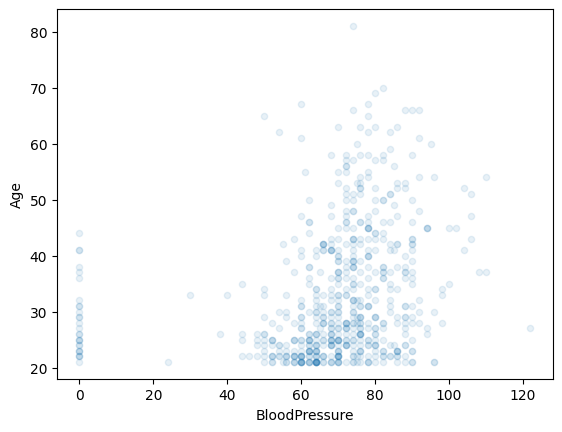

In [30]:
#диаграмма рассеяния
data.plot(kind='scatter',x='BloodPressure',y = 'Age',alpha = 0.1);

In [31]:
corr_matrix = data.corr()
corr_matrix['BloodPressure'].sort_values(ascending=False)

BloodPressure               1.000000
BMI                         0.296622
Age                         0.262184
SkinThickness               0.213663
Pregnancies                 0.155418
Glucose                     0.145011
Insulin                     0.086881
DiabetesPedigreeFunction    0.065920
Name: BloodPressure, dtype: float64

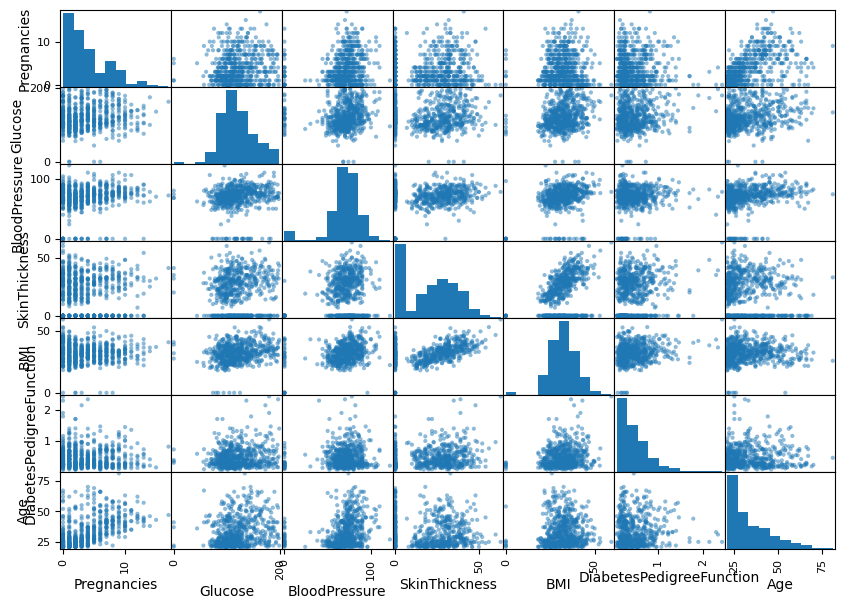

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']
scatter_matrix(data[attributes],figsize=(10,7));

In [33]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.114487,0.155418,-0.048427,-0.065215,-0.000204,-0.029423,0.545966
Glucose,0.114487,1.000000,0.145011,0.051615,0.315744,0.258121,0.158997,0.233964
BloodPressure,0.155418,0.145011,1.000000,0.213663,0.086881,0.296622,0.065920,0.262184
SkinThickness,-0.048427,0.051615,0.213663,1.000000,0.460591,0.402827,0.207226,-0.107174
Insulin,-0.065215,0.315744,0.086881,0.460591,1.000000,0.203459,0.211429,-0.065233
BMI,-0.000204,0.258121,0.296622,0.402827,0.203459,1.000000,0.206462,0.045892
DiabetesPedigreeFunction,-0.029423,0.158997,0.065920,0.207226,0.211429,0.206462,1.000000,0.035808
Age,0.545966,0.233964,0.262184,-0.107174,-0.065233,0.045892,0.035808,1.000000


<AxesSubplot: xlabel='Pregnancies', ylabel='Age'>

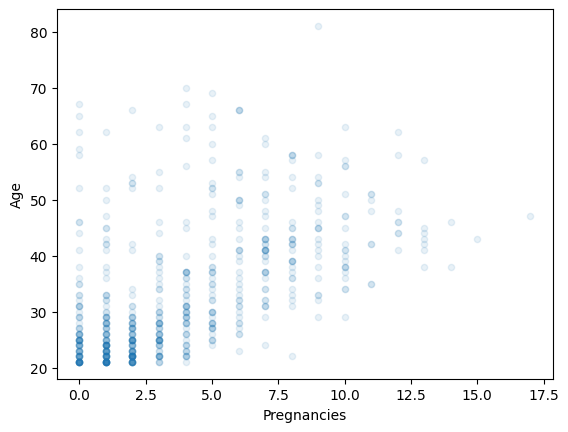

In [34]:
data.plot(kind='scatter',x='Pregnancies',y='Age',alpha=0.1)

In [35]:
data['rooms_per_household'] = data['Insulin'] / data['Pregnancies']
data['bedrooms_per_room'] = data['SkinThickness'] / data.Pregnancies
data['population_per_household'] = data['Age'] / data.SkinThickness

In [36]:
corr_matrix = data.corr()
corr_matrix['Pregnancies'].sort_values(ascending=False)

Pregnancies                 1.000000
Age                         0.545966
population_per_household    0.342662
BloodPressure               0.155418
Glucose                     0.114487
BMI                        -0.000204
DiabetesPedigreeFunction   -0.029423
SkinThickness              -0.048427
Insulin                    -0.065215
rooms_per_household        -0.357401
bedrooms_per_room          -0.545783
Name: Pregnancies, dtype: float64

### Работа с пропусками


In [57]:
# убрать объекты выборки с пропусками
data.dropna(subset=['Insulin'])
# убрать признак
data.drop('Insulin',axis = 1)
# замена медианой
median = data['Insulin'].median()
data.Insulin.fillna(median,inplace=True)

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [65]:
data_num = data.drop('ocean_proximity',axis = 1)
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

KeyError: "['ocean_proximity'] not found in axis"

In [43]:
median = data['Insulin'].median()
data.Insulin.fillna(median,inplace=True)

In [44]:
median = data['Pregnancies'].median()
data.Pregnancies.fillna(median,inplace=True)

In [45]:
median = data['Glucose'].median()
data.Glucose.fillna(median,inplace=True)

In [46]:
median = data['BloodPressure'].median()
data.BloodPressure.fillna(median,inplace=True)

In [47]:
median = data['SkinThickness'].median()
data.SkinThickness.fillna(median,inplace=True)

In [48]:
median = data['BMI'].median()
data.BMI.fillna(median,inplace=True)

In [49]:
median = data['DiabetesPedigreeFunction'].median()
data.DiabetesPedigreeFunction.fillna(median,inplace=True)

In [50]:
median = data['Age'].median()
data.Age.fillna(median,inplace=True)

In [ ]:
##Конвейризация

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

NameError: name 'CombinedAttributeAdder' is not defined

In [12]:
result = result.replace('<=50K', 0,regex=True)

In [13]:
result = result.replace('>50K', 1,regex=True)

In [14]:
data_transformed = pipeline.fit_transform(data)

In [18]:
data_transformed

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266]])

In [19]:
pipeline.fit(data)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data,result)

LinearRegression()

In [21]:
pipeline.transform(data)

array([[ 0.03067056, -1.06361075,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.83710898, -1.008707  ,  1.13473876, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-0.04264203,  0.2450785 , -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [-1.21564337,  0.11095988, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266],
       [ 0.98373415,  0.92989258, -0.42005962, ...,  0.34095391,
        -0.04540836, -0.02217266]])

In [23]:
preds = model.predict(data)

In [24]:
preds

array([ 0.15969   ,  0.48415206, -0.01326322, ...,  0.0641282 ,
       -0.03778849,  0.71961644])

In [25]:
result

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Target, Length: 32561, dtype: int64